In [2]:
import pandas as pd
Student_perfo=pd.read_csv(r'C:\Users\sandy\Desktop\Project_realected_practice\Student_performance\StudentsPerformance.csv')
Student_perfo.head(10)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
5,female,group B,associate's degree,standard,none,71,83,78
6,female,group B,some college,standard,completed,88,95,92
7,male,group B,some college,free/reduced,none,40,43,39
8,male,group D,high school,free/reduced,completed,64,64,67
9,female,group B,high school,free/reduced,none,38,60,50


In [3]:
print(Student_perfo.describe())
print(Student_perfo.info())


       math score  reading score  writing score
count  1000.00000    1000.000000    1000.000000
mean     66.08900      69.169000      68.054000
std      15.16308      14.600192      15.195657
min       0.00000      17.000000      10.000000
25%      57.00000      59.000000      57.750000
50%      66.00000      70.000000      69.000000
75%      77.00000      79.000000      79.000000
max     100.00000     100.000000     100.000000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   re

First observation Since the mark can be 0 to 100 and min and max value of all three values are lies between that range there is no possibility for the outliers and skew i need to know the mean, median and the mode or I can check it by the histplot lets check the skewness.

In [4]:
a=Student_perfo['math score'].mean()
round(float(a))

66

First check the skewness using Mean, Median and Mode

In [5]:
A=['math score','reading score','writing score']
Mean=[]
Median=[]
Mode=[]
for i in A:
    Mean1=Student_perfo[i].mean()
    a=round(float(Mean1))
    Mean.append(a)

    Median1=Student_perfo[i].median()
    b=round(float(Median1))
    Median.append(b)

    Mode1=Student_perfo[i].mode()[0]
    c=round(float(Mode1))
    Mode.append(c)

for i in range(len(Mean)):
    if Mean[i]>=Median[i]>=Mode[i]:
        print('Right-Skewed')
    elif Mean[i]<=Median[i]<=Mode[i]:
        print('Left-Skewed')
    else:
        print("normally distributed")

print(Mean)
print(Median)
print(Mode)

Right-Skewed
Left-Skewed
Left-Skewed
[66, 69, 68]
[66, 70, 69]
[65, 72, 74]


Since there is not much difference in the values even it show the skewness we can take it as a normal distribution for proper conclution we can either do shapario test or we can check visually in here I go with visual 

<Axes: xlabel='math score', ylabel='Count'>

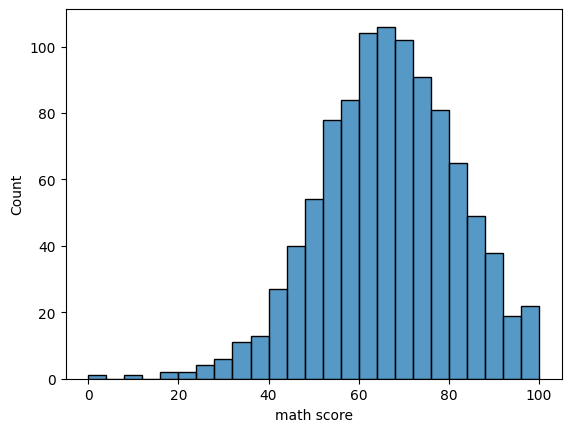

In [6]:
import seaborn as sns
A=['math score','reading score','writing score']
sns.histplot(Student_perfo[A[0]])

<Axes: xlabel='reading score', ylabel='Count'>

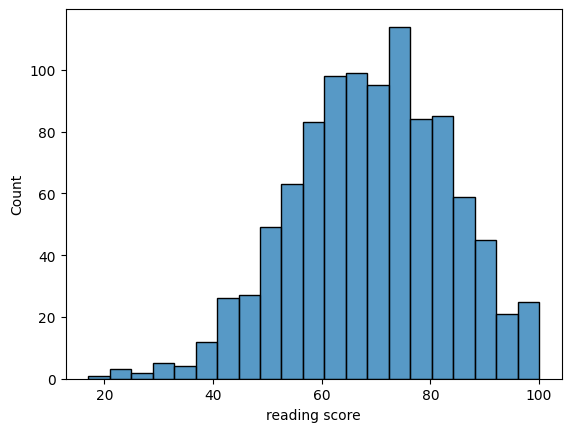

In [7]:
sns.histplot(Student_perfo[A[1]])

<Axes: xlabel='writing score', ylabel='Count'>

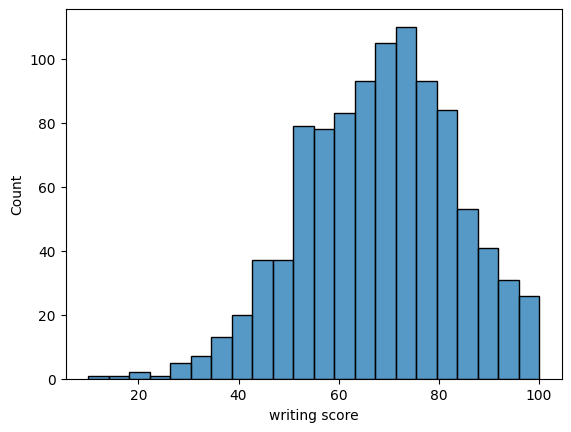

In [8]:
sns.histplot(Student_perfo[A[2]])

As I guesses all three data is Distributed normally

In [9]:
Student_perfo.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


First I analysing the categarical columns 

<Axes: xlabel='race/ethnicity', ylabel='count'>

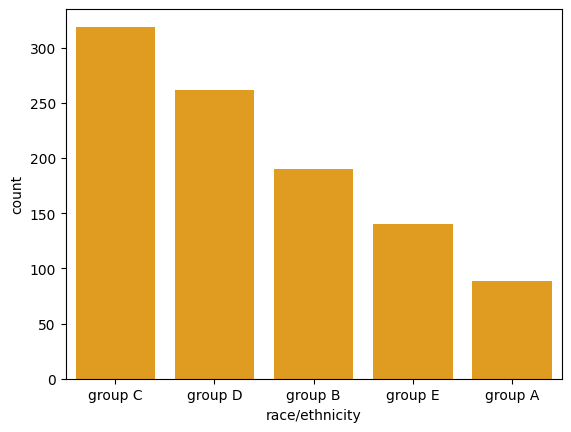

In [10]:
sns.countplot(x = 'race/ethnicity', data = Student_perfo, color = 'orange', order = Student_perfo['race/ethnicity'].value_counts().index)

It shows in our data the group C and group D are majorly present and group A is the minority in our Data

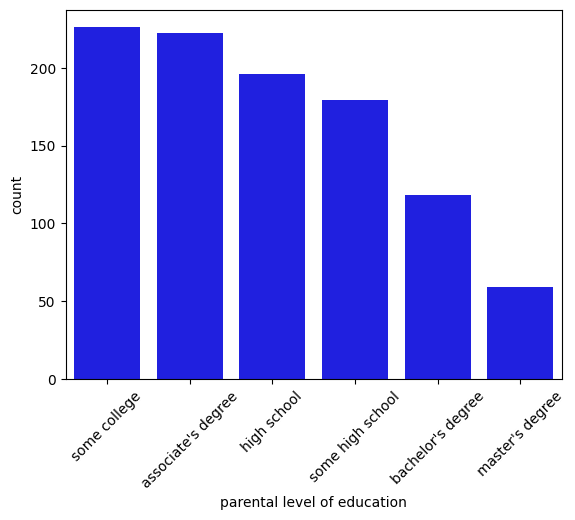

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='parental level of education', data=Student_perfo, color='blue', order=Student_perfo['parental level of education'].value_counts().index)

# Rotate the x-axis labels
plt.xticks(rotation=45)

# Display the plot
plt.show()

It shows in our data the most of the parents studied in some random college and have associate's degree are majorly present and parents who have a bachelor's and master's degree are comparatively less

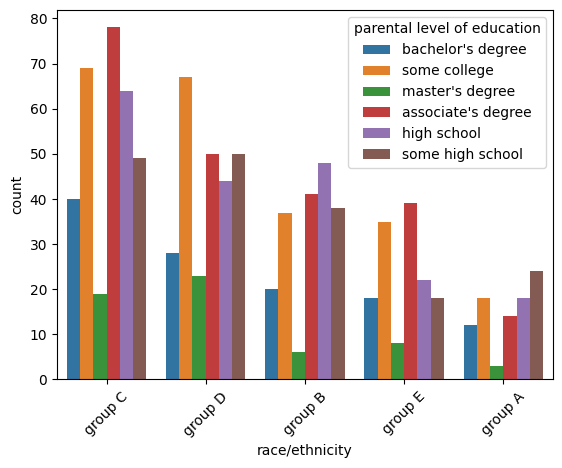

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='race/ethnicity', data=Student_perfo, hue='parental level of education', order=Student_perfo['race/ethnicity'].value_counts().index)

# Rotate the x-axis labels
plt.xticks(rotation=45)

# Display the plot
plt.show()

It gives a indepth understanding of the parental level of the education and Group they are present 

Group C - Majority of the parents are have the associate's degree

Group D - Majority of the parents are have some college degree

Group B - Majority of the parents are have the High school level of education 

Group E - Majority of the parents are have the associate's degree

Group A - Majority of the parents are have the some High school level of education

Now analysing the Male and Female ratio in the Dataframe

In [13]:
Deno=Student_perfo['gender'].count()
Male=Student_perfo[Student_perfo['gender']=='male']['gender'].count() 
Malepercent=(Male/Deno)*100
Female=Student_perfo[Student_perfo['gender']=='female']['gender'].count() 
Femalepercent=(Female/Deno)*100
print(f'Male percentage in dataframe is', round(Malepercent))
print(f'Female percentage in dataframe is', round(Femalepercent))



Male percentage in dataframe is 48
Female percentage in dataframe is 52


<Axes: xlabel='gender', ylabel='count'>

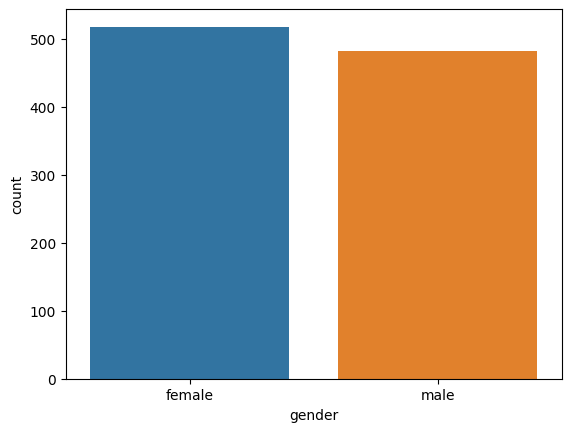

In [14]:
import seaborn as sns

sns.countplot(x='gender', data=Student_perfo, hue='gender')

In this dataframe there is more Female students then male students



Now lets analyse about the lunch types and relation between the lunch type and group 

<Axes: xlabel='lunch', ylabel='count'>

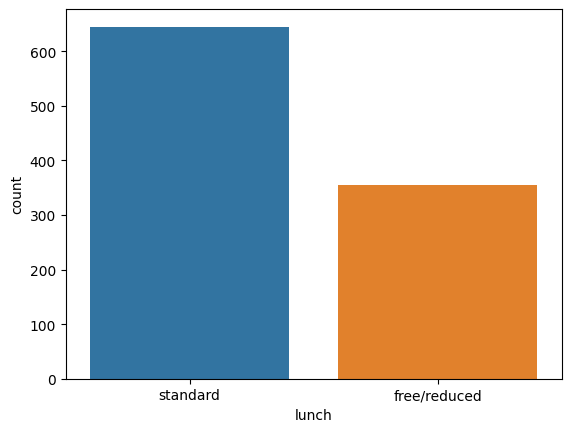

In [15]:
import seaborn as sns

sns.countplot(x='lunch', data=Student_perfo, hue='lunch')

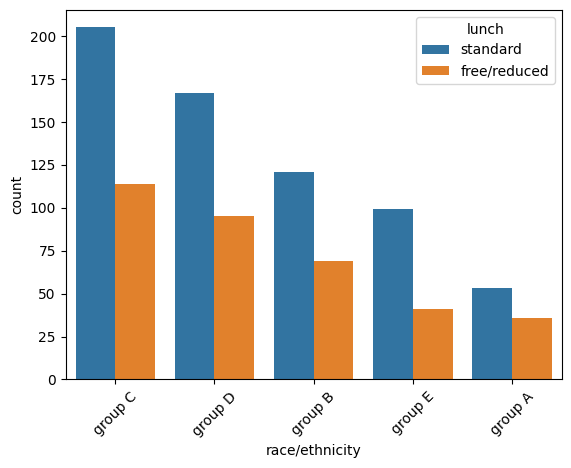

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='race/ethnicity', data=Student_perfo, hue='lunch', order=Student_perfo['race/ethnicity'].value_counts().index)

# Rotate the x-axis labels
plt.xticks(rotation=45)

# Display the plot
plt.show()

By seeing this we can understand lunch type is not decided based on the group and hence it ensures there is not have a inequality in lunch type 

In [17]:
Student_perfo.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


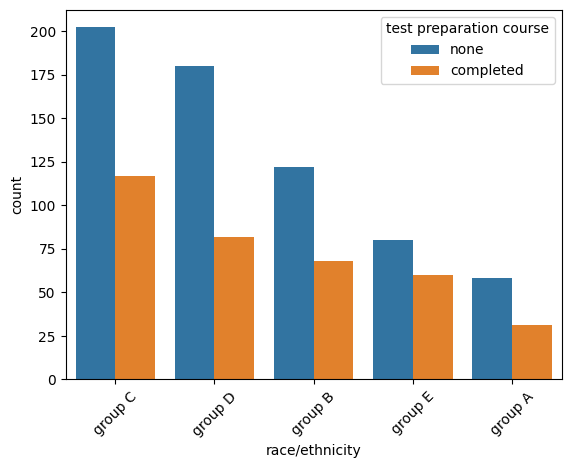

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='race/ethnicity', data=Student_perfo, hue='test preparation course', order=Student_perfo['race/ethnicity'].value_counts().index)

# Rotate the x-axis labels
plt.xticks(rotation=45)

# Display the plot
plt.show()

In [19]:
Deno=Student_perfo['gender'].count()
Male=Student_perfo[Student_perfo['gender']=='male']['gender'].count() 
Malepercent=(Male/Deno)*100
Female=Student_perfo[Student_perfo['gender']=='female']['gender'].count() 
Femalepercent=(Female/Deno)*100
print(f'Male percentage in dataframe is', round(Malepercent))
print(f'Female percentage in dataframe is', round(Femalepercent))



Male percentage in dataframe is 48
Female percentage in dataframe is 52


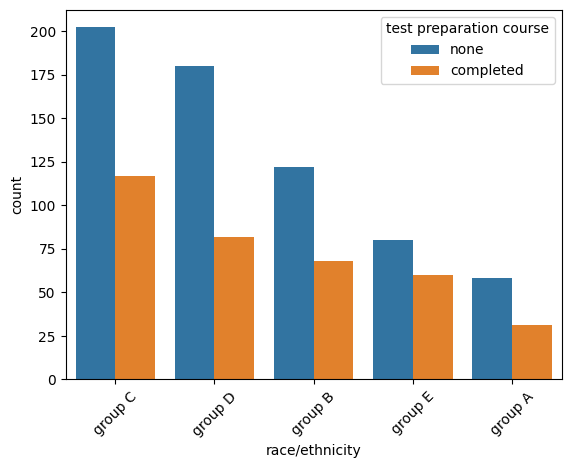

race/ethnicity  test preparation course
group A         completed                   31
                none                        58
group B         completed                   68
                none                       122
group C         completed                  117
                none                       202
group D         completed                   82
                none                       180
group E         completed                   60
                none                        80
Name: gender, dtype: int64


In [20]:
a=Student_perfo.groupby(['race/ethnicity','test preparation course']).count()

sns.countplot(x='race/ethnicity', data=Student_perfo, hue='test preparation course', order=Student_perfo['race/ethnicity'].value_counts().index)

# Rotate the x-axis labels
plt.xticks(rotation=45)

# Display the plot
plt.show()
print(a['gender'])

In Group E the completed to none ratio is higher than other Groups

Now I am going to a analysis between the numerical vs categorical 

First Groups vs a who have a higher avg marks

In [21]:
Student_perfo.head(2)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88


  race/ethnicity  mean_math_score
0        group A        61.629213
1        group B        63.452632
2        group C        64.463950
3        group D        67.362595
4        group E        73.821429


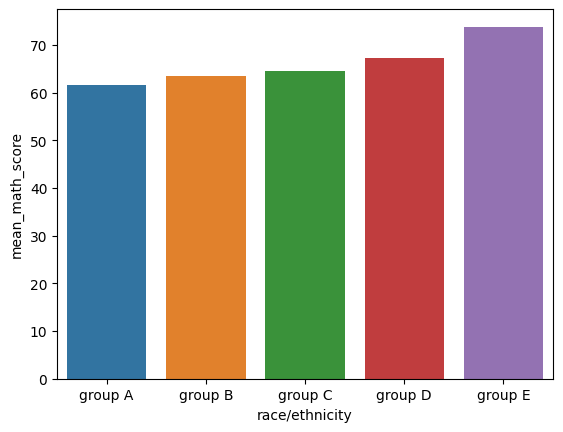

In [22]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming Student_perfo is your DataFrame
Grouped = Student_perfo.groupby('race/ethnicity')['math score'].mean().reset_index()

# Renaming the columns for clarity
Grouped.columns = ['race/ethnicity', 'mean_math_score']

print(Grouped)

sns.barplot(x='race/ethnicity', y='mean_math_score', data=Grouped,hue='race/ethnicity')

plt.show()


By seeing this the group E students average is greater than all other Group and Group A students has a less average 

Similarly for other two subjects 

  race/ethnicity     score_type  mean_score
0        group A  reading score   64.674157
1        group B  reading score   67.352632
2        group C  reading score   69.103448
3        group D  reading score   70.030534
4        group E  reading score   73.028571
5        group A  writing score   62.674157
6        group B  writing score   65.600000
7        group C  writing score   67.827586
8        group D  writing score   70.145038
9        group E  writing score   71.407143


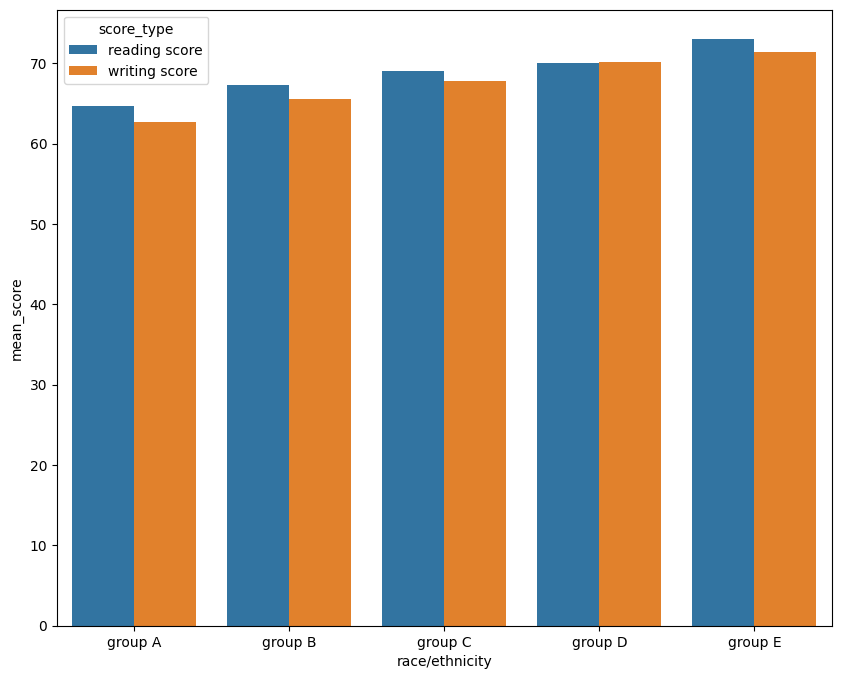

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


Grouped = Student_perfo.groupby('race/ethnicity')[['reading score', 'writing score']].mean().reset_index()

# Reshaping the DataFrame to long format
melted_grouped = pd.melt(Grouped, id_vars='race/ethnicity', 
                          value_vars=['reading score', 'writing score'],
                          var_name='score_type', value_name='mean_score')

print(melted_grouped)

# Create the bar plot
plt.figure(figsize=(10, 8))
sns.barplot(x='race/ethnicity', y='mean_score', hue='score_type', data=melted_grouped)

plt.show()

Now I analysing the max and min scores for all three subject since now I know how to display multple value at the same time by doing this we can understand how Group E students scoring good marks in all three subjects

   race/ethnicity     score_type  max_score
0         group A  reading score        100
1         group B  reading score         97
2         group C  reading score        100
3         group D  reading score        100
4         group E  reading score        100
5         group A  writing score         97
6         group B  writing score         96
7         group C  writing score        100
8         group D  writing score        100
9         group E  writing score        100
10        group A     math score        100
11        group B     math score         97
12        group C     math score         98
13        group D     math score        100
14        group E     math score        100


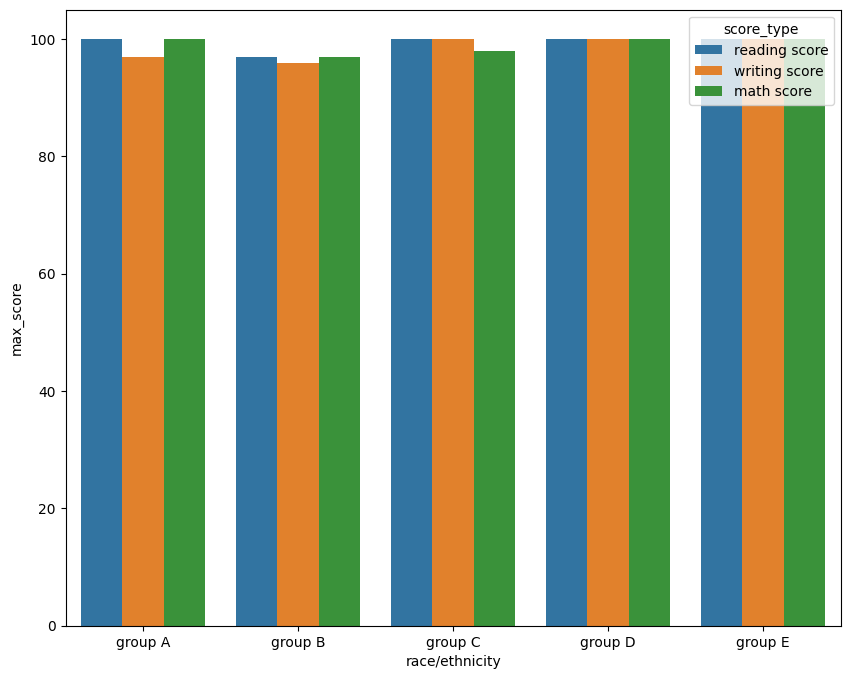

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


Grouped = Student_perfo.groupby('race/ethnicity')[['reading score', 'writing score','math score']].max().reset_index()

# Reshaping the DataFrame to long format
melted_grouped = pd.melt(Grouped, id_vars='race/ethnicity', 
                          value_vars=['reading score', 'writing score','math score'],
                          var_name='score_type', value_name='max_score')

print(melted_grouped)

# Create the bar plot
plt.figure(figsize=(10, 8))
sns.barplot(x='race/ethnicity', y='max_score', hue='score_type', data=melted_grouped)

plt.show()

   race/ethnicity     score_type  min_score
0         group A  reading score         23
1         group B  reading score         24
2         group C  reading score         17
3         group D  reading score         31
4         group E  reading score         26
5         group A  writing score         19
6         group B  writing score         15
7         group C  writing score         10
8         group D  writing score         32
9         group E  writing score         22
10        group A     math score         28
11        group B     math score          8
12        group C     math score          0
13        group D     math score         26
14        group E     math score         30


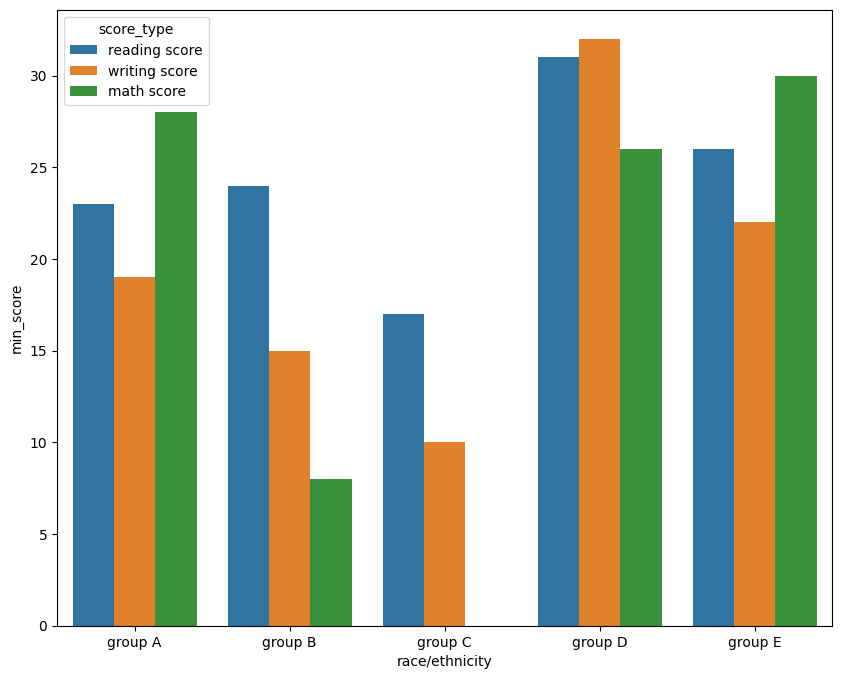

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


Grouped = Student_perfo.groupby('race/ethnicity')[['reading score', 'writing score','math score']].min().reset_index()

# Reshaping the DataFrame to long format
melted_grouped = pd.melt(Grouped, id_vars='race/ethnicity', 
                          value_vars=['reading score', 'writing score','math score'],
                          var_name='score_type', value_name='min_score')

print(melted_grouped)

# Create the bar plot
plt.figure(figsize=(10, 8))
sns.barplot(x='race/ethnicity', y='min_score', hue='score_type', data=melted_grouped)

plt.show()

Now we can check whether there is a relation between the parents graduation level Vs marks scored my their children 

   parental level of education     score_type  avg_score
0           associate's degree  reading score  70.927928
1            bachelor's degree  reading score  73.000000
2                  high school  reading score  64.704082
3              master's degree  reading score  75.372881
4                 some college  reading score  69.460177
5             some high school  reading score  66.938547
6           associate's degree  writing score  69.896396
7            bachelor's degree  writing score  73.381356
8                  high school  writing score  62.448980
9              master's degree  writing score  75.677966
10                some college  writing score  68.840708
11            some high school  writing score  64.888268
12          associate's degree     math score  67.882883
13           bachelor's degree     math score  69.389831
14                 high school     math score  62.137755
15             master's degree     math score  69.745763
16                some college 

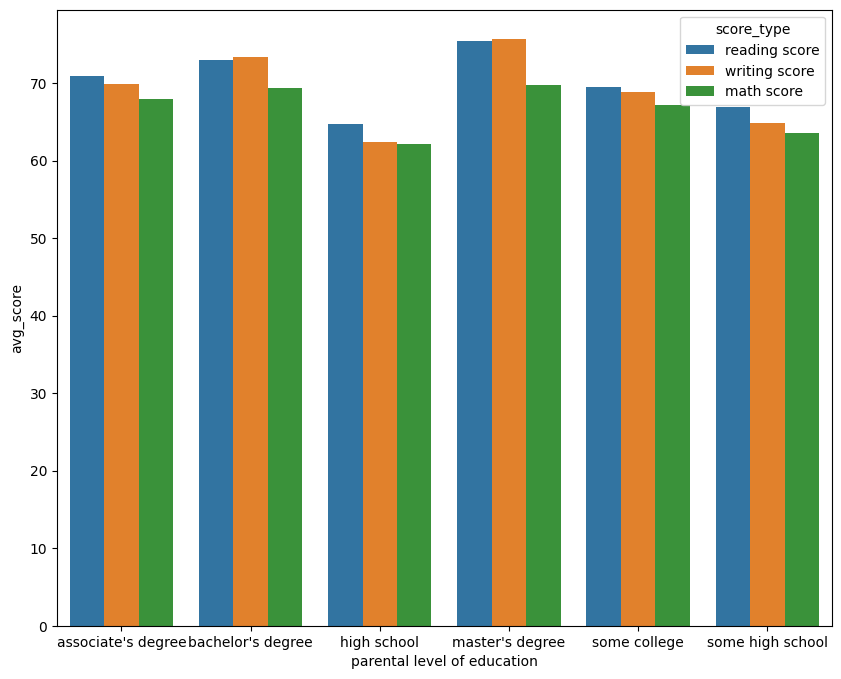

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


Grouped = Student_perfo.groupby('parental level of education')[['reading score', 'writing score','math score']].mean().reset_index()

# Reshaping the DataFrame to long format
melted_grouped = pd.melt(Grouped, id_vars='parental level of education', 
                          value_vars=['reading score', 'writing score','math score'],
                          var_name='score_type', value_name='avg_score')

print(melted_grouped)

# Create the bar plot
plt.figure(figsize=(10, 8))
sns.barplot(x='parental level of education', y='avg_score', hue='score_type', data=melted_grouped)

plt.show()

By this we can see the student of parents who have a master's or bachelor's degree the minimum marks is considerably higher than other parental level of education (but parental level of education doesn't impact much in agv scores of the students)

   parental level of education     score_type  max_score
0           associate's degree  reading score        100
1            bachelor's degree  reading score        100
2                  high school  reading score         99
3              master's degree  reading score        100
4                 some college  reading score        100
5             some high school  reading score        100
6           associate's degree  writing score        100
7            bachelor's degree  writing score        100
8                  high school  writing score        100
9              master's degree  writing score        100
10                some college  writing score         99
11            some high school  writing score        100
12          associate's degree     math score        100
13           bachelor's degree     math score        100
14                 high school     math score         99
15             master's degree     math score         95
16                some college 

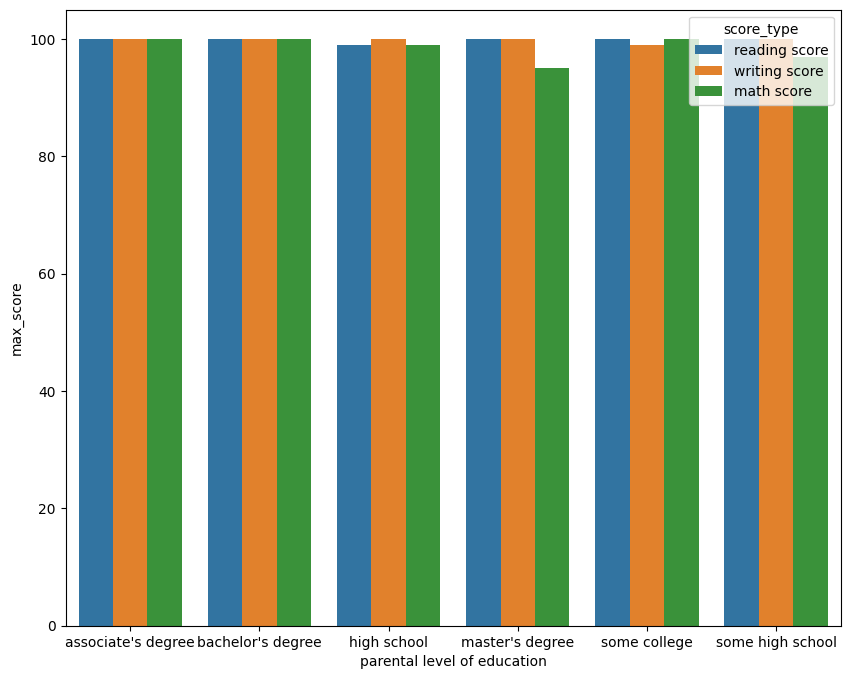

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


Grouped = Student_perfo.groupby('parental level of education')[['reading score', 'writing score','math score']].max().reset_index()

# Reshaping the DataFrame to long format
melted_grouped = pd.melt(Grouped, id_vars='parental level of education', 
                          value_vars=['reading score', 'writing score','math score'],
                          var_name='score_type', value_name='max_score')

print(melted_grouped)

# Create the bar plot
plt.figure(figsize=(10, 8))
sns.barplot(x='parental level of education', y='max_score', hue='score_type', data=melted_grouped)

plt.show()

It shows parental level of education is not much important in scoring higher marks in subjects

   parental level of education     score_type  min_score
0           associate's degree  reading score         31
1            bachelor's degree  reading score         41
2                  high school  reading score         24
3              master's degree  reading score         42
4                 some college  reading score         23
5             some high school  reading score         17
6           associate's degree  writing score         35
7            bachelor's degree  writing score         38
8                  high school  writing score         15
9              master's degree  writing score         46
10                some college  writing score         19
11            some high school  writing score         10
12          associate's degree     math score         26
13           bachelor's degree     math score         29
14                 high school     math score          8
15             master's degree     math score         40
16                some college 

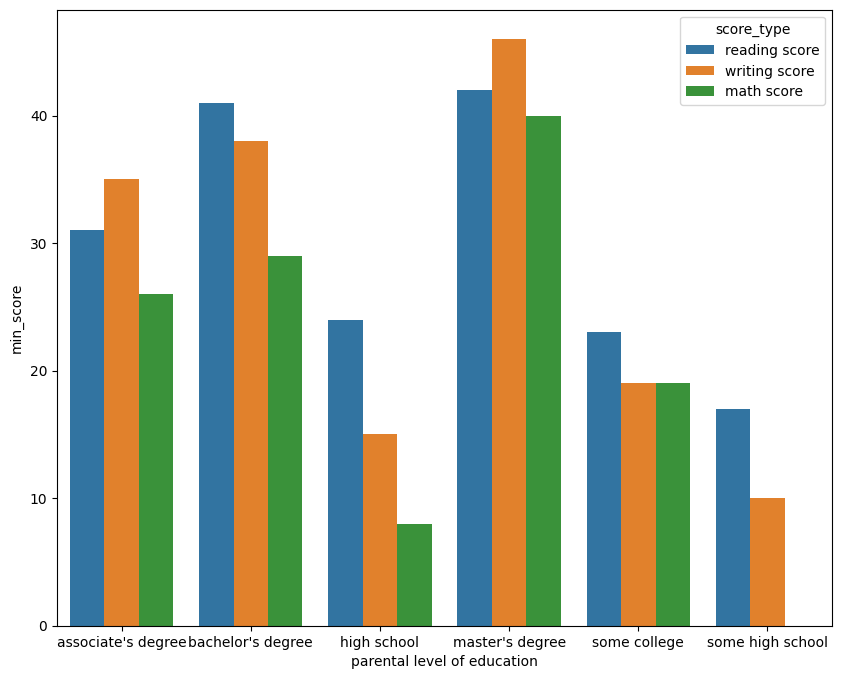

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


Grouped = Student_perfo.groupby('parental level of education')[['reading score', 'writing score','math score']].min().reset_index()

# Reshaping the DataFrame to long format
melted_grouped = pd.melt(Grouped, id_vars='parental level of education', 
                          value_vars=['reading score', 'writing score','math score'],
                          var_name='score_type', value_name='min_score')

print(melted_grouped)

# Create the bar plot
plt.figure(figsize=(10, 8))
sns.barplot(x='parental level of education', y='min_score', hue='score_type', data=melted_grouped)

plt.show()

By this we can see the student of parents who have a master's or bachelor's degree the minimum marks is comparitively higher than other parental level of education 

In [31]:
Student_perfo.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


Whether test preperation course impact the test result let see 

  test preparation course     score_type  max_score
0               completed  reading score  73.893855
1                    none  reading score  66.534268
2               completed  writing score  74.418994
3                    none  writing score  64.504673
4               completed     math score  69.695531
5                    none     math score  64.077882


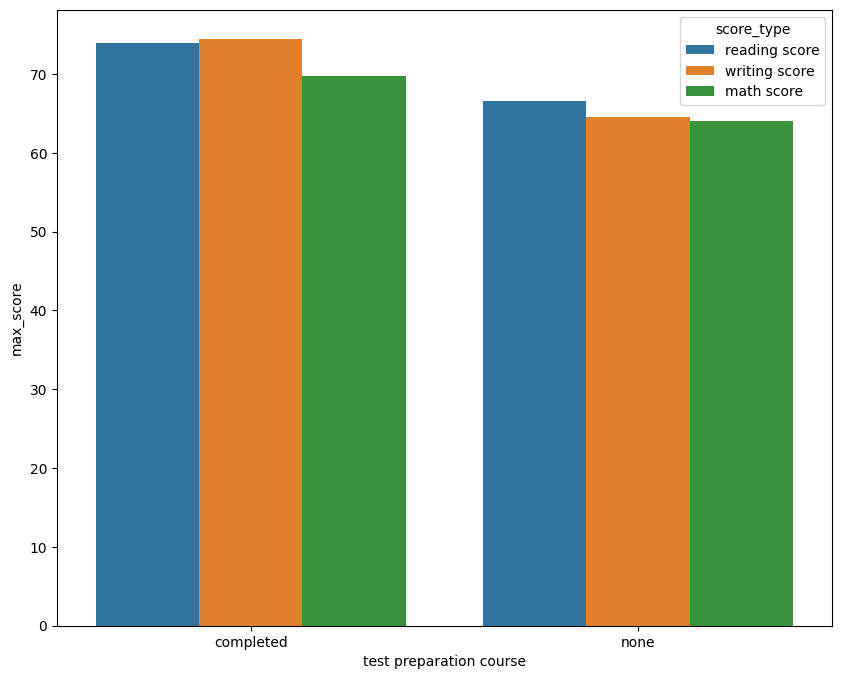

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


Grouped = Student_perfo.groupby('test preparation course')[['reading score', 'writing score','math score']].mean().reset_index()

# Reshaping the DataFrame to long format
melted_grouped = pd.melt(Grouped, id_vars='test preparation course', 
                          value_vars=['reading score', 'writing score','math score'],
                          var_name='score_type', value_name='max_score')

print(melted_grouped)

# Create the bar plot
plt.figure(figsize=(10, 8))
sns.barplot(x='test preparation course', y='max_score', hue='score_type', data=melted_grouped)

plt.show()

In average score also it doesn't impact much

  test preparation course     score_type  max_score
0               completed  reading score        100
1                    none  reading score        100
2               completed  writing score        100
3                    none  writing score        100
4               completed     math score        100
5                    none     math score        100


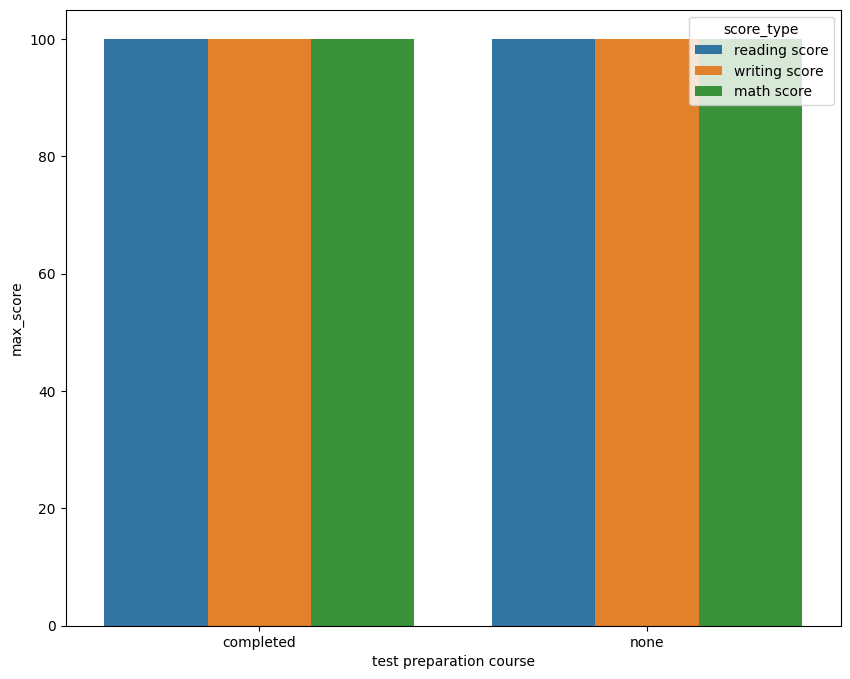

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


Grouped = Student_perfo.groupby('test preparation course')[['reading score', 'writing score','math score']].max().reset_index()

# Reshaping the DataFrame to long format
melted_grouped = pd.melt(Grouped, id_vars='test preparation course', 
                          value_vars=['reading score', 'writing score','math score'],
                          var_name='score_type', value_name='max_score')

print(melted_grouped)

# Create the bar plot
plt.figure(figsize=(10, 8))
sns.barplot(x='test preparation course', y='max_score', hue='score_type', data=melted_grouped)

plt.show()

In max case it doesn't impact much

  test preparation course     score_type  min_score
0               completed  reading score         37
1                    none  reading score         17
2               completed  writing score         36
3                    none  writing score         10
4               completed     math score         23
5                    none     math score          0


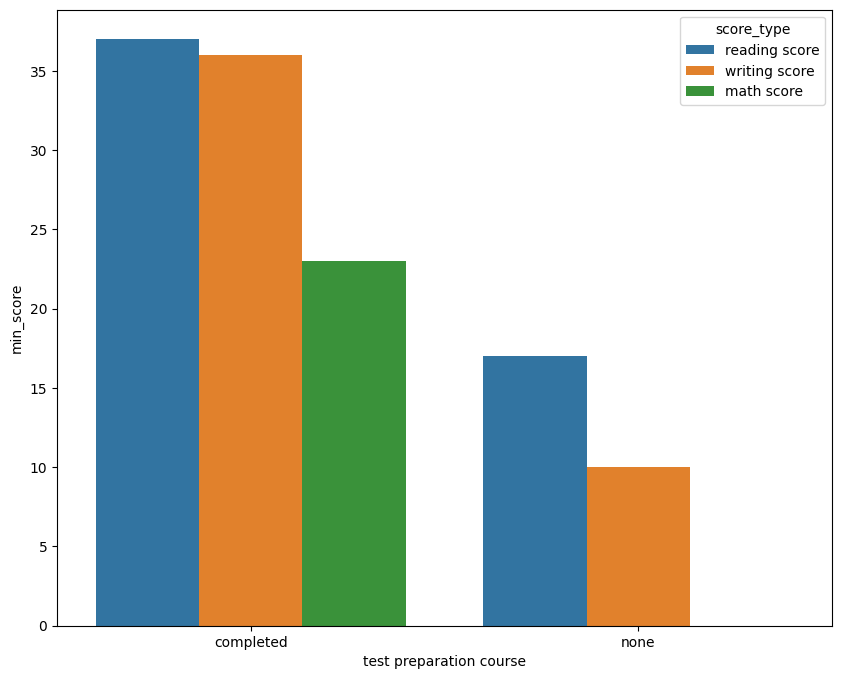

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


Grouped = Student_perfo.groupby('test preparation course')[['reading score', 'writing score','math score']].min().reset_index()

# Reshaping the DataFrame to long format
melted_grouped = pd.melt(Grouped, id_vars='test preparation course', 
                          value_vars=['reading score', 'writing score','math score'],
                          var_name='score_type', value_name='min_score')

print(melted_grouped)

# Create the bar plot
plt.figure(figsize=(10, 8))
sns.barplot(x='test preparation course', y='min_score', hue='score_type', data=melted_grouped)

plt.show()

By seeing this we can conclude the students who completes the test preparation course achive atleast a decent score when compare one who not completed it.It impacting majorly in minimum scores

   gender     score_type  max_score
0  female  reading score  72.608108
1    male  reading score  65.473029
2  female  writing score  72.467181
3    male  writing score  63.311203
4  female     math score  63.633205
5    male     math score  68.728216


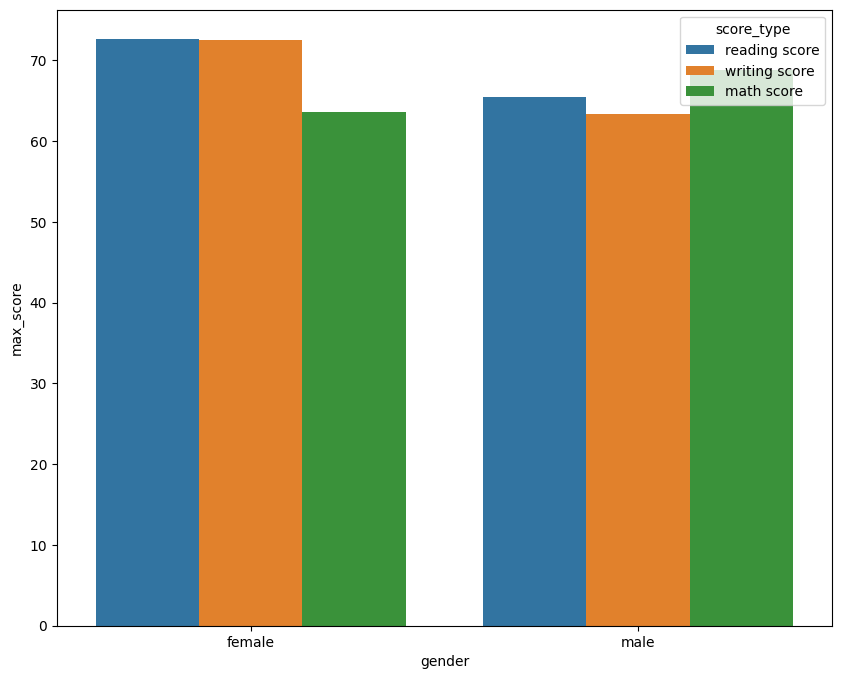

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


Grouped = Student_perfo.groupby('gender')[['reading score', 'writing score','math score']].mean().reset_index()

# Reshaping the DataFrame to long format
melted_grouped = pd.melt(Grouped, id_vars='gender', 
                          value_vars=['reading score', 'writing score','math score'],
                          var_name='score_type', value_name='max_score')

print(melted_grouped)

# Create the bar plot
plt.figure(figsize=(10, 8))
sns.barplot(x='gender', y='max_score', hue='score_type', data=melted_grouped)

plt.show()

Female students have a better average than the male students

   gender     score_type  max_score
0  female  reading score         17
1    male  reading score         23
2  female  writing score         10
3    male  writing score         15
4  female     math score          0
5    male     math score         27


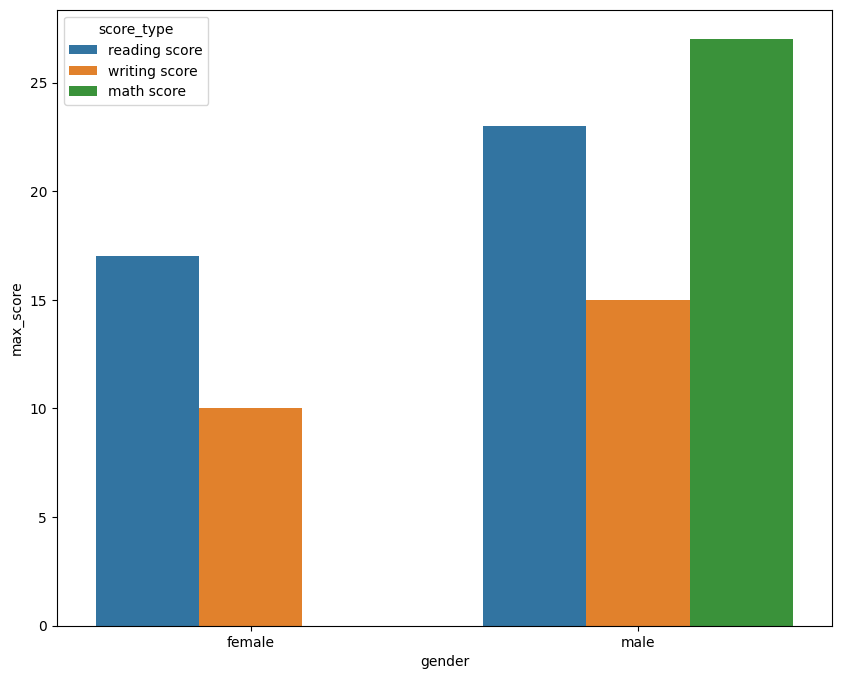

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


Grouped = Student_perfo.groupby('gender')[['reading score', 'writing score','math score']].min().reset_index()

# Reshaping the DataFrame to long format
melted_grouped = pd.melt(Grouped, id_vars='gender', 
                          value_vars=['reading score', 'writing score','math score'],
                          var_name='score_type', value_name='max_score')

print(melted_grouped)

# Create the bar plot
plt.figure(figsize=(10, 8))
sns.barplot(x='gender', y='max_score', hue='score_type', data=melted_grouped)

plt.show()

Female students score lesser marks than the male students

I Think Most of the insights have been covered for further analysis I can do hypothesis testing but I this for this dataframe it no needed since all this plots shows the relationship between the Attributes so I decide to stop here